In [3]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
# upload do arquivo

from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
# criação do dataframe

df = pd.read_excel('AdventureWorks.xlsx')

In [6]:
# quantidade de linhas e colunas

df.shape

(904, 16)

In [7]:
# verificação de dados faltantes

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [8]:
# tipos de dados por colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# amostra da estrutura da planilha

df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
55,2008-06-01,2008-06-07,306,1202,19052,200806014CS576,330.66,998.00,6,0.0,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
267,2009-07-28,2009-08-01,307,2496,19130,200907285CS720,5.09,9.99,288,0.0,2877.12,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver
63,2008-07-06,2008-07-14,306,1202,19054,200807064CS588,330.66,998.00,6,0.0,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
801,2008-02-08,2008-02-21,199,384,18819,200802083CS570,348.58,758.00,6,227.4,4320.60,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
375,2008-11-29,2008-12-03,307,1203,19110,200811294CS656,324.69,980.00,14,2058.0,11662.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
168,2008-10-11,2008-10-21,307,1202,19106,200810114CS637,330.66,998.00,12,0.0,11976.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
341,2008-09-05,2008-09-17,199,1202,18868,200809054CS688,330.66,998.00,20,1996.0,17964.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
538,2009-01-25,2009-01-30,306,366,19061,200901253CS736,348.58,758.00,4,606.4,2425.60,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
821,2008-11-07,2008-11-15,199,1203,18884,200811074CS789,324.69,980.00,6,1176.0,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
403,2008-01-31,2008-02-11,306,1178,19047,200801314CS529,330.66,998.00,12,2395.2,9580.80,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White


In [10]:
# custo total

df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
round(df['Custo'].sum(),2)

2486783.05

In [11]:
# receita total

df['Valor Venda'].sum()

5984606.1426

In [12]:
# lucro total

df['Lucro'] = df['Valor Venda'] - df['Custo']
round(df['Lucro'].sum(),2)

3497823.09

In [13]:
# demonstração do resultado anual por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Valor Venda', 'Custo', 'Lucro'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Valor Venda      Custo         Lucro
Data Venda Marca                                                 
2008       Adventure Works  6.231518e+05  316510.64  3.066412e+05
           Contoso          1.308980e+05   74481.97  5.641600e+04
           Fabrikam         2.433558e+06  876537.33  1.557021e+06
2009       Adventure Works  8.334513e+05  428056.24  4.053951e+05
           Contoso          3.194986e+05  181239.63  1.382590e+05
           Fabrikam         1.644049e+06  609957.24  1.034091e+06

In [14]:
# Modificando os valores com notação cientifica

pd.options.display.float_format = '{:20,.2f}'.format

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


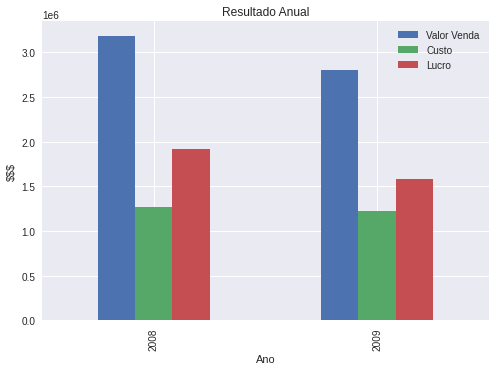

In [15]:
# grafico demonstração do resultado anual

df.groupby(df['Data Venda'].dt.year)['Valor Venda', 'Custo', 'Lucro'].sum().plot.bar(title = 'Resultado Anual')
plt.xlabel('Ano')
plt.ylabel('$$$');

In [16]:
# quantidade de itens vendidos

df.groupby(df['Produto'])['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

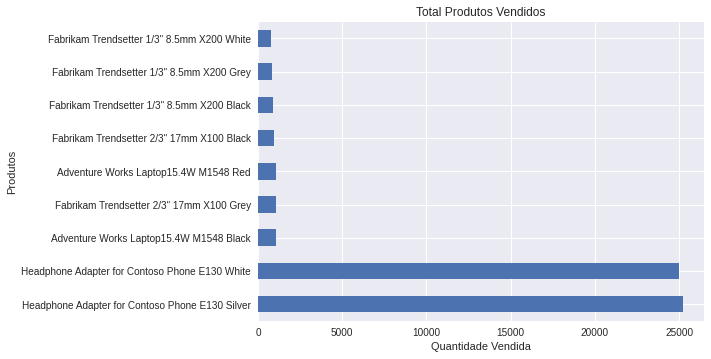

In [17]:
# grafico quantitativo de itens vendidos

df.groupby(df['Produto'])['Quantidade'].sum().sort_values(ascending=False).plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produtos');

In [19]:
# base de vendas 2009

df_2009 = df[df['Data Venda'].dt.year == 2009]

Text(0, 0.5, 'Lucro')

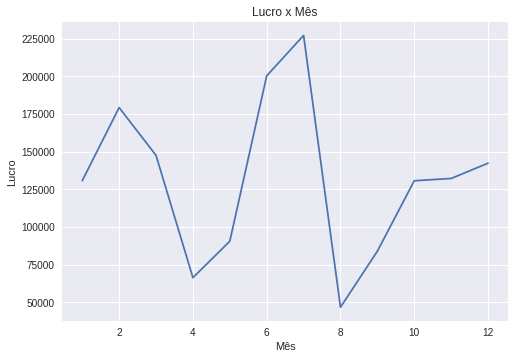

In [20]:
# vendas mensais 2009

df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

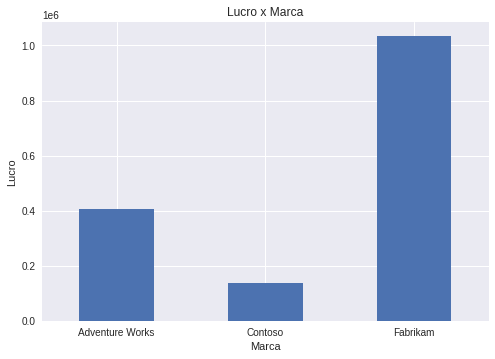

In [21]:
# lucro por marca em 2009

df_2009.groupby(df_2009['Marca'])['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')

In [22]:
# tempo de envio

df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

# extraindo os dias

df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [23]:
# tempo minimo de envio

df['Tempo_Envio'].min()

4

In [24]:
# tempo maximo de envio

df['Tempo_Envio'].max()

20

In [25]:
# analise completa do tempo de envio

df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

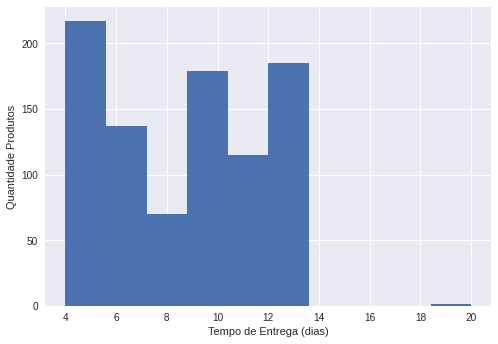

In [26]:
# histograma

plt.hist(df['Tempo_Envio'])
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Quantidade Produtos')
plt.xticks(rotation='horizontal');

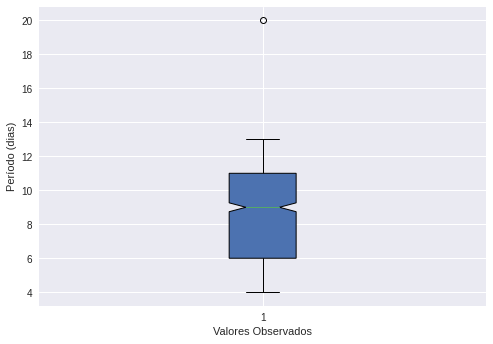

In [27]:
# grafico boxplot

plt.boxplot(df['Tempo_Envio'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Valores Observados')
plt.ylabel('Período (dias)')
plt.xticks(rotation='horizontal')
colors = ['blue']

In [28]:
# detecção do outlier ou exceção

df[df['Tempo_Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
